In [1]:
from langchain_groq import ChatGroq
from langgraph.graph  import StateGraph   , START , END
from langgraph.graph import MessagesState
from IPython.display   import Image , display
from langchain_core.tools import tool
from langgraph.prebuilt import tools_condition
from langgraph.prebuilt import ToolNode
import os 
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
model = ChatGroq(
    model="llama-3.1-8b-instant",   
    api_key=os.getenv("GROQ_API_KEY"),
    temperature=0
)

In [3]:
def  multiply(x:int , y:int )-> int :
    """Returns the multiplication of given two integers"""
    return  x*y 

In [4]:
llm_with_tools = model.bind_tools([multiply])


def tool_calling_llm(state:MessagesState):
    return { "messages" : llm_with_tools.invoke(state["messages"])}

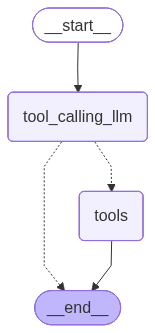

In [5]:
builder= StateGraph(MessagesState)
builder.add_node("tool_calling_llm" , tool_calling_llm)
builder.add_node("tools" , ToolNode([multiply]))

builder.add_edge(START , "tool_calling_llm")
builder.add_conditional_edges( "tool_calling_llm" ,tools_condition)
builder.add_edge("tools" , END)

graph= builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [9]:
from langchain_core.messages import HumanMessage
messages=[HumanMessage(content= "Multiply 3 and 4")]
messages= graph.invoke({"messages":messages})

for m in messages['messages']:
    m.pretty_print()



================================ Human Message =================================

Multiply 3 and 4
================================== Ai Message ==================================
Tool Calls:
  multiply (qwwgch2en)
 Call ID: qwwgch2en
  Args:
    x: 3
    y: 4
================================= Tool Message =================================
Name: multiply

12
